In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


# Importing the Required Directories

In [2]:
#Importing the Required Directories

#Data Analysis Libraries
import pandas as pd
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

# About Dataset
**Context** 
Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.

Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.

**Content**
In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

In [4]:
#Accessing the Dataset
final_df=pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')

In [5]:
#Looking at the Dataset
final_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
final_df.shape

(4746, 12)

**Observation:**
* The dataset has 4746 rows and 12 columns

In [7]:
#Accessing the columns of the Dataset
final_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**Observation:**
* This dataset doesn't contain any Null values.

In [9]:
#Checking the Mean of the Rent
print('The Mean of the Rent is {}'.format(final_df['Rent'].mean()))
print('The Standard Deviation of Rent is {}'.format(final_df['Rent'].std()))

The Mean of the Rent is 34993.45132743363
The Standard Deviation of Rent is 78106.4129373483


# EDA

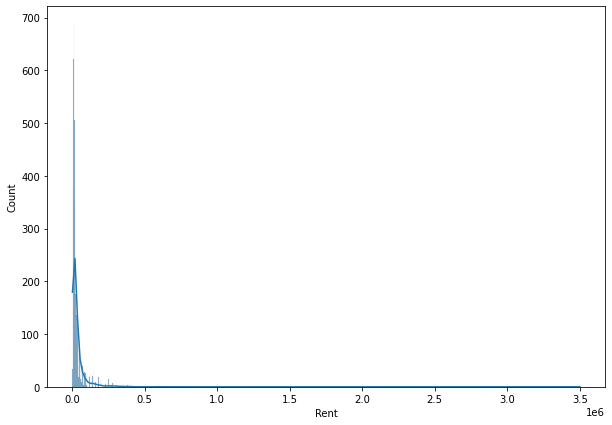

In [10]:
#Analyzing the Rent
plt.figure(figsize=(10,7))
sns.histplot(final_df.Rent,kde=True)
plt.show()

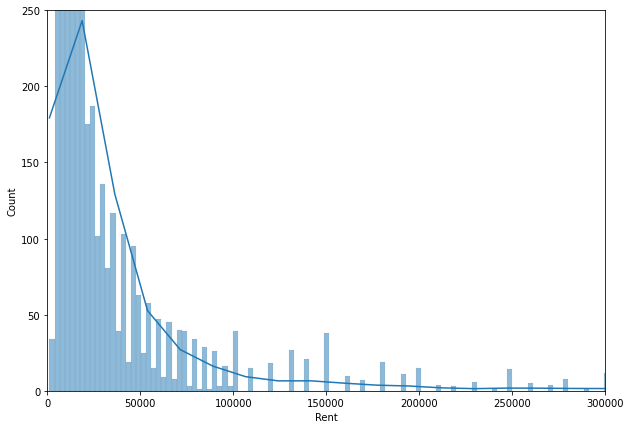

In [11]:
plt.figure(figsize=(10,7))
sns.histplot(final_df.Rent,kde=True)
plt.xlim(0,300000)
plt.ylim(0,250)
plt.show()

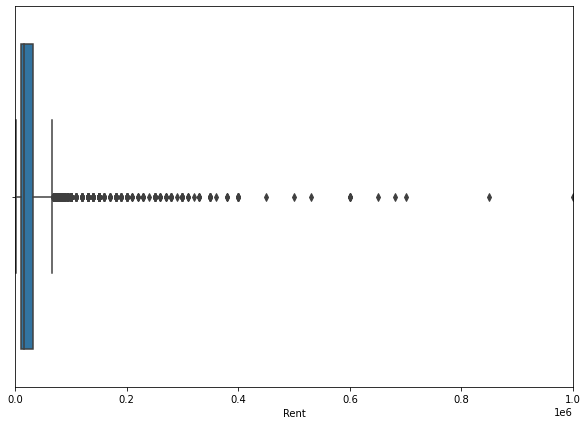

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(final_df.Rent)
plt.xlim(0,1000000)
plt.show()

In [13]:
#We will apply Log Transformation in order to convert Rent into Normal Distribution
final_df['Rent']=np.log1p(final_df['Rent'])

When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. It improves linearity between our dependent and independent variables. It boosts validity of our statistical analyses.

<AxesSubplot:xlabel='Rent'>

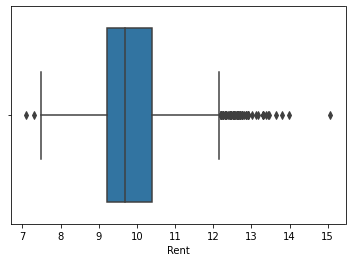

In [14]:
sns.boxplot('Rent',data=final_df)

In [15]:
#Analyzing the Posted On column
final_df['Posted On'].nunique()

81

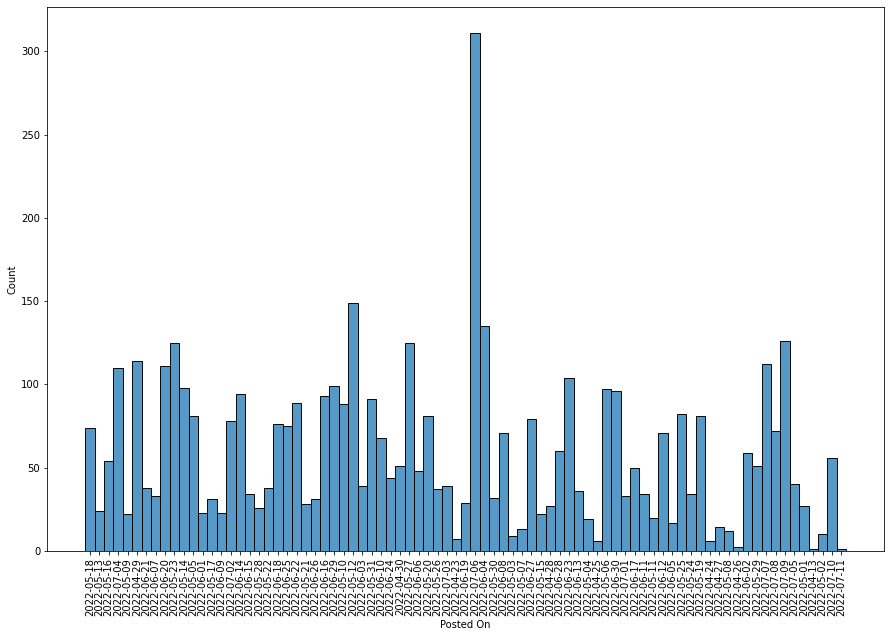

In [16]:
plt.figure(figsize=(15,10))
sns.histplot(final_df['Posted On'])
plt.xticks(rotation='vertical')
plt.show()

In [17]:
#Analyzing the BHK column
final_df.BHK.unique()

array([2, 1, 3, 6, 4, 5])

<AxesSubplot:xlabel='BHK', ylabel='count'>

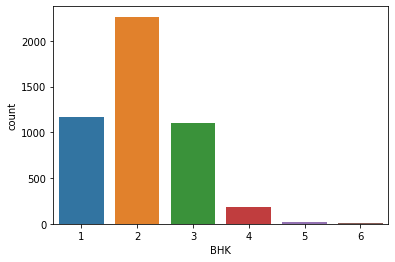

In [18]:
sns.countplot('BHK',data=final_df)

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

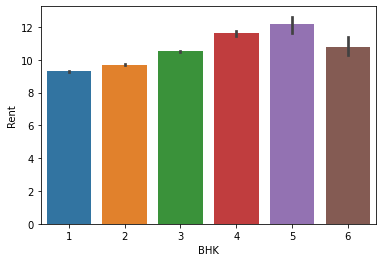

In [19]:
sns.barplot(x='BHK',y='Rent',data=final_df)

**Observation:**
* The Average Rent of the 5BHK is the highest compared to all.

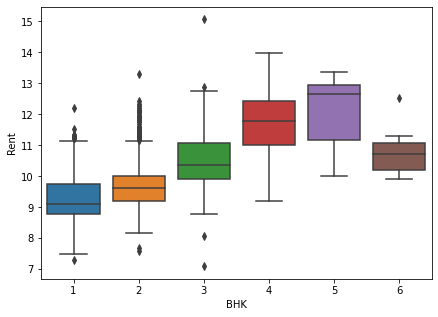

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(x='BHK',y='Rent',data=final_df)
plt.show()

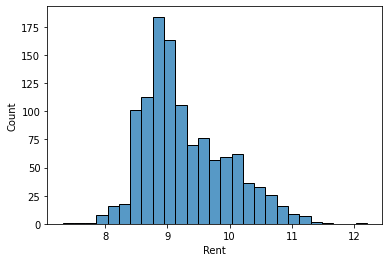

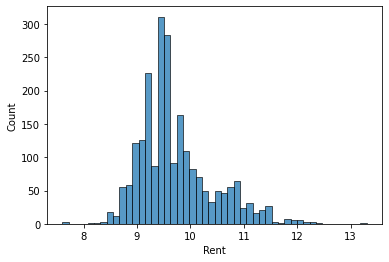

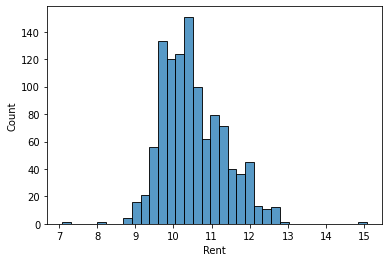

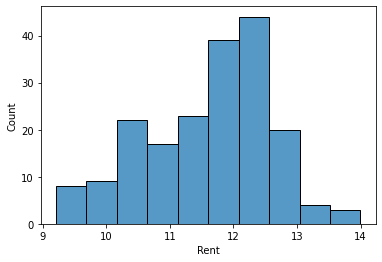

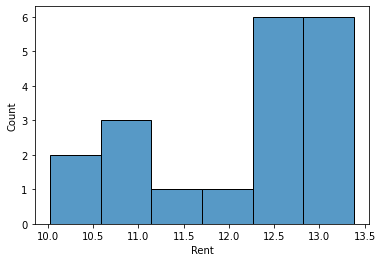

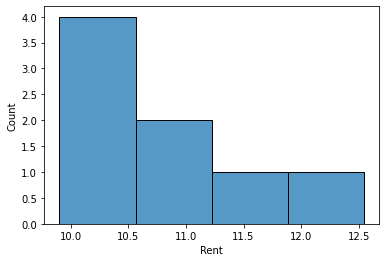

In [21]:
for i in range(6):
    sns.histplot(final_df[final_df['BHK']==i+1].Rent)
    plt.show()

**Observation:**
* Each BHK contains a lot of Outliers.

**Insights**
* Will Remove few of them without making the Dataset Thin

In [22]:
#Analyzing the Size column

#Unique values of Size
final_df['Size'].nunique()

615

<AxesSubplot:xlabel='Size', ylabel='Count'>

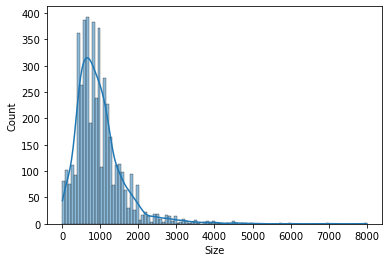

In [23]:
#Distribution of Size column
sns.histplot(final_df.Size,kde=True)

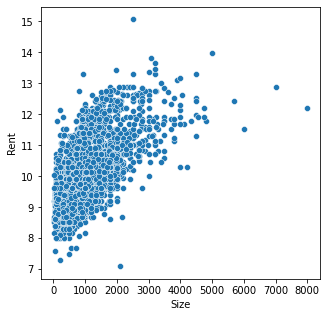

In [24]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=final_df.Size,y=final_df.Rent)
plt.show()

<AxesSubplot:xlabel='Size'>

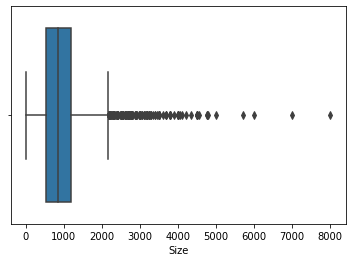

In [25]:
sns.boxplot('Size',data=final_df)

**Observation:**
* More the Size of House,More the Rent is
* Contains a lot of Outliers.

In [26]:
#Analyzing the Floor Column
final_df.Floor.value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [27]:
#Analyzing the Area Type
final_df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

<AxesSubplot:xlabel='Area Type', ylabel='count'>

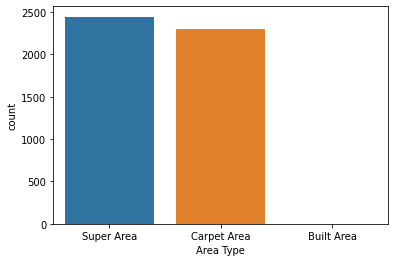

In [28]:
sns.countplot('Area Type',data=final_df)

**Observation:**
* The no. of Super Area is higher than all of the areas.
* Built Area contains only two houses for Rent in the Dataset.

In [29]:
final_df.groupby('Area Type')['Rent'].mean()

Area Type
Built Area      9.157777
Carpet Area    10.248720
Super Area      9.530714
Name: Rent, dtype: float64

<AxesSubplot:xlabel='Area Type', ylabel='Rent'>

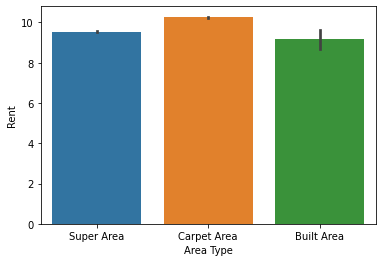

In [30]:
sns.barplot(final_df['Area Type'],y=final_df['Rent'])

**Observation:**
* Built Area Houses are the Cheapest.
* Super Area Houses are cheaper as compared to Carpet Area.

In [31]:
#Analyzing the Area Locality
final_df['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [32]:
#Analyzing the City Column
final_df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

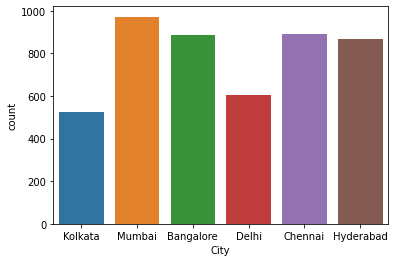

In [33]:
sns.countplot(final_df.City)

In [34]:
final_df.groupby('City')['Rent'].mean()

City
Bangalore     9.634777
Chennai       9.645544
Delhi         9.855434
Hyderabad     9.634704
Kolkata       9.150935
Mumbai       10.937095
Name: Rent, dtype: float64

<AxesSubplot:xlabel='City', ylabel='Rent'>

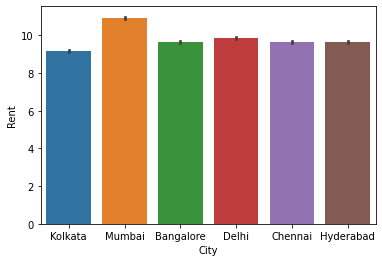

In [35]:
sns.barplot('City','Rent',data=final_df)

**Observation**
* The Average Rent of Mumbai House is the Highest than all of the Cities.

<AxesSubplot:xlabel='City', ylabel='Rent'>

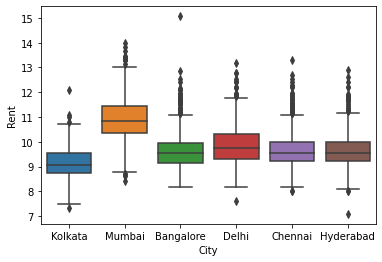

In [36]:
sns.boxplot('City','Rent',data=final_df)

In [37]:
#Analyzing the Furnishing Status
final_df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

* 50% of the Houses are Semi Furnished.
* 40% of the Houses are Unfurnished.
* Rest of the Houses are Furnished.

In [38]:
final_df.groupby('Furnishing Status')['Rent'].mean()

Furnishing Status
Furnished         10.352446
Semi-Furnished     9.979319
Unfurnished        9.575146
Name: Rent, dtype: float64

<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

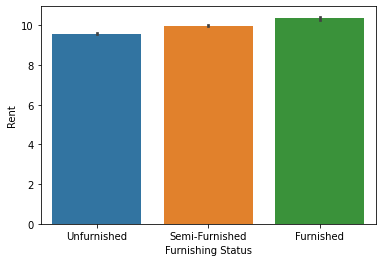

In [39]:
sns.barplot('Furnishing Status','Rent',data=final_df)

In [40]:
#Analyzing the Tenant Preferred
final_df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

<AxesSubplot:xlabel='Tenant Preferred', ylabel='Rent'>

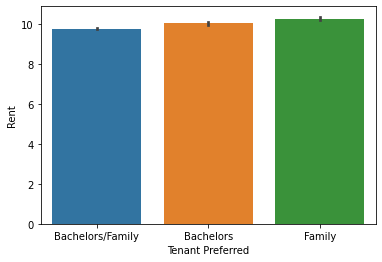

In [41]:
sns.barplot('Tenant Preferred','Rent',data=final_df)

In [42]:
#Analyzing the Bathroom Column
final_df['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

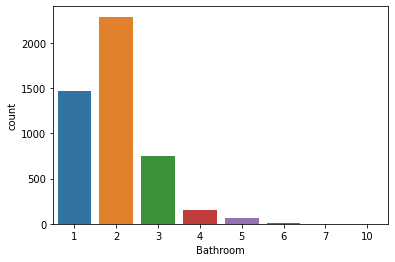

In [43]:
sns.countplot('Bathroom',data=final_df)

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

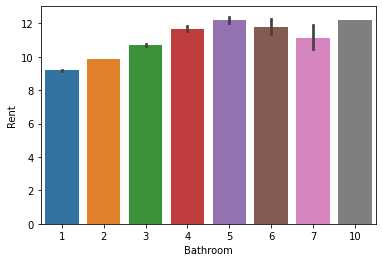

In [44]:
sns.barplot('Bathroom','Rent',data=final_df)

In [45]:
#Analyzing the Point of Contact
final_df['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

<AxesSubplot:xlabel='Point of Contact', ylabel='Rent'>

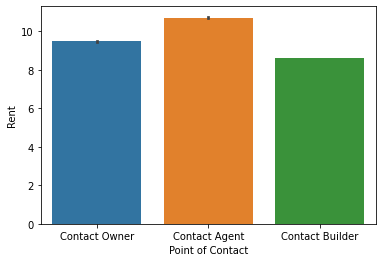

In [46]:
sns.barplot('Point of Contact','Rent',data=final_df)

# Data Cleaning

In [47]:
#Supressing the Outliers
final_df=final_df[(final_df['Rent']<14) & (final_df['Size']<5000)]

In [48]:
final_df.shape

(4740, 12)

# Feature Engineering

In [49]:
#Splitting the Posted on Date into Day,Month and Year
final_df['Day']=final_df['Posted On'].str.split('-',expand=True)[2].astype(int)
final_df['Month']=final_df['Posted On'].str.split('-',expand=True)[1].astype(int)
final_df['Year']=final_df['Posted On'].str.split('-',expand=True)[0].astype(int)

In [50]:
#Removing the Posted On column
final_df.drop('Posted On',axis=1,inplace=True)

In [51]:
#Converting the Categorical Variables into Numeric Form
final_df=pd.get_dummies(data=final_df,columns=['Area Type','City','Furnishing Status','Bathroom','Tenant Preferred','Point of Contact'])

In [52]:
final_df.head()

,BHK,Rent,Size,Floor,Area Locality,Day,Month,Year,Area Type_Built Area,Area Type_Carpet Area,...,Bathroom_4,Bathroom_5,Bathroom_6,Bathroom_7,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,9.210440,1100,Ground out of 2,Bandel,18,5,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,9.903538,800,1 out of 3,"Phool Bagan, Kankurgachi",13,5,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,9.741027,1000,1 out of 3,Salt Lake City Sector 2,16,5,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2,9.210440,800,1 out of 2,Dumdum Park,4,7,2022,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2,8.922792,850,1 out of 2,South Dum Dum,9,5,2022,0,1,...,0,0,0,0,1,0,0,0,0,1


In [53]:
#Splitting the Floor into valuable Information
final_df['Living Floor']=final_df['Floor'].str.split('out of',expand=True)[0]
final_df['Total Floors']=final_df['Floor'].str.split('out of',expand=True)[1]

In [54]:
final_df['Living Floor'].value_counts()

1                  1159
2                   945
Ground              925
3                   511
4                   270
5                   164
6                    93
7                    74
10                   67
8                    66
9                    64
12                   47
11                   43
15                   41
14                   34
18                   26
Upper Basement       23
17                   22
16                   21
19                   16
13                   15
20                   12
25                   12
Lower Basement       10
23                    9
21                    6
24                    5
30                    5
34                    4
28                    4
27                    3
35                    3
22                    3
32                    3
26                    3
65                    3
60                    3
40                    2
36                    2
48                    2
45                    2
53              

In [55]:
final_df[final_df['Living Floor']=='Ground']=0
final_df[final_df['Living Floor']=='Ground ']=0
final_df[final_df['Living Floor']=='Upper Basement ']=1
final_df[final_df['Living Floor']=='Lower Basement ']=0

In [56]:
final_df[final_df['Living Floor']=='Upper Basement']=1
final_df[final_df['Living Floor']=='Lower Basement']=0

In [57]:
final_df['Living Floor']=final_df['Living Floor'].astype(int)

In [58]:
final_df['Total Floors'].value_counts()

0      936
 4     819
 3     701
 2     511
 5     392
      ... 
 66      1
 85      1
 71      1
 81      1
 39      1
Name: Total Floors, Length: 68, dtype: int64

In [59]:
for i in final_df[final_df['Total Floors'].isna()]['Living Floor'].index:
    final_df.loc[i,'Total Floors']=final_df.loc[i,'Living Floor']

In [60]:
final_df['Total Floors']=final_df['Total Floors'].astype(int)

In [61]:
#Remove the Floor Feature
final_df.drop('Floor',axis=1,inplace=True)

**Encoding**

In [62]:
#Applying HotLabelEncoder on Area Locality
le=LabelEncoder()
final_df['Area Locality']=le.fit_transform(final_df['Area Locality'].astype(str))

In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 0 to 4745
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4740 non-null   int64  
 1   Rent                               4740 non-null   float64
 2   Size                               4740 non-null   int64  
 3   Area Locality                      4740 non-null   int64  
 4   Day                                4740 non-null   int64  
 5   Month                              4740 non-null   int64  
 6   Year                               4740 non-null   int64  
 7   Area Type_Built Area               4740 non-null   uint8  
 8   Area Type_Carpet Area              4740 non-null   uint8  
 9   Area Type_Super Area               4740 non-null   uint8  
 10  City_Bangalore                     4740 non-null   uint8  
 11  City_Chennai                       4740 non-null   uint8

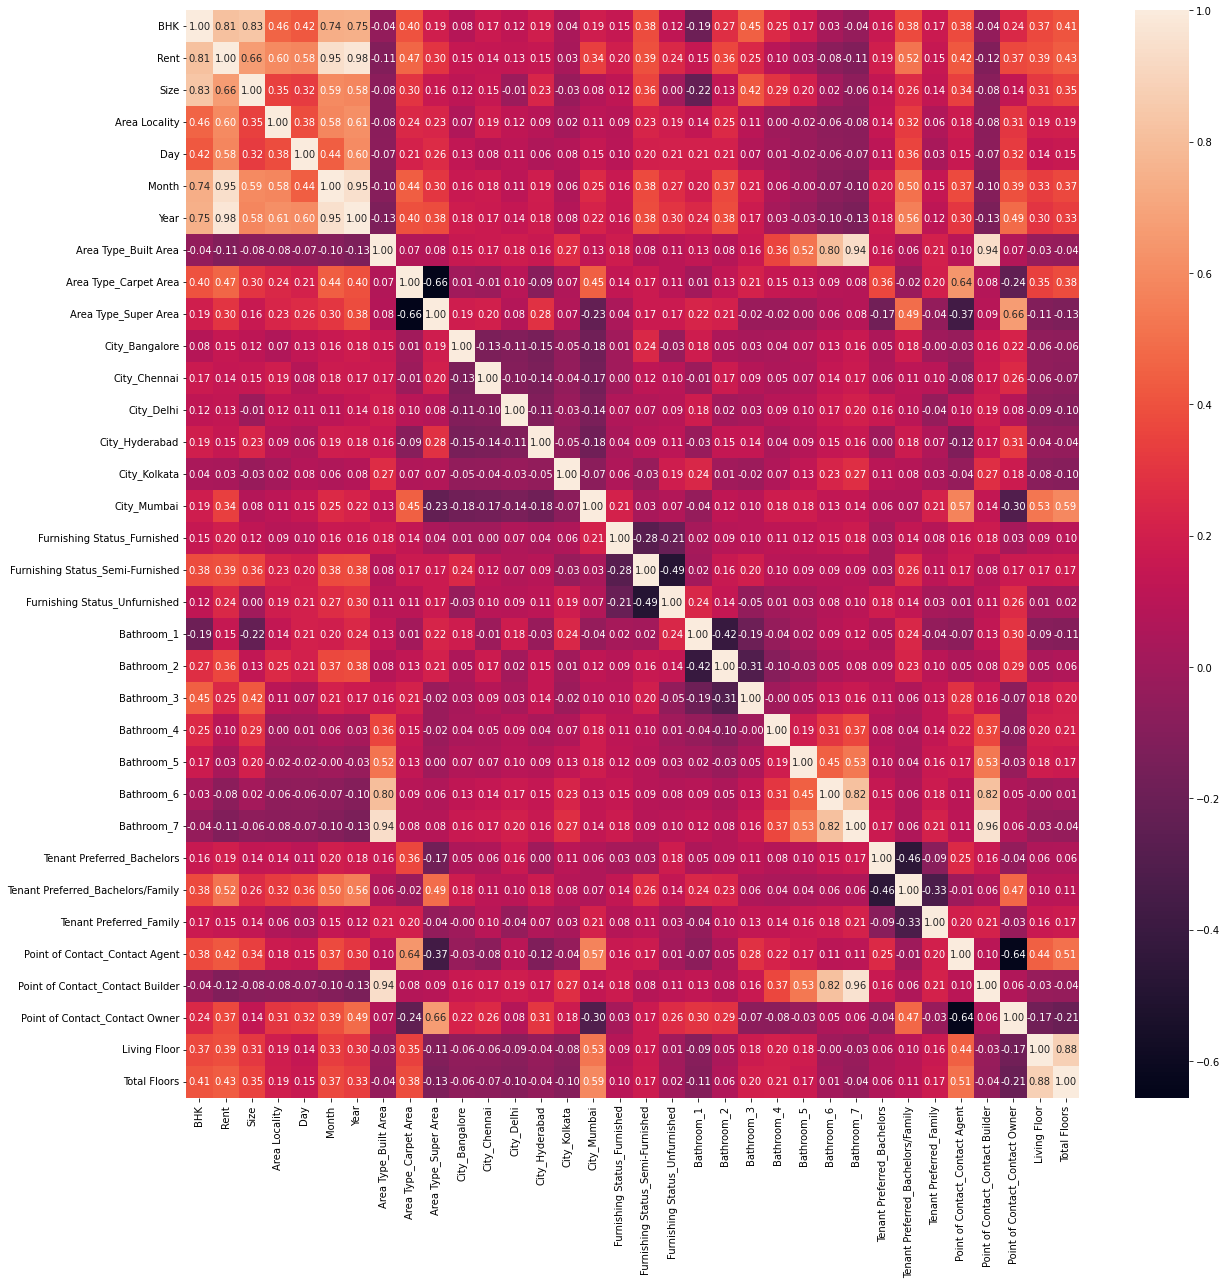

In [64]:
#Correlation between all Features
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f')
plt.show()

In [65]:
#Dropping these Features in order to Reduce the Problem of Multi-Collinearity
final_df.drop('Living Floor',axis=1,inplace=True)
final_df.drop('Point of Contact_Contact Builder',axis=1,inplace=True)
final_df.drop('Bathroom_6',axis=1,inplace=True)
final_df.drop('Bathroom_7',axis=1,inplace=True)
final_df.drop('Month',axis=1,inplace=True)

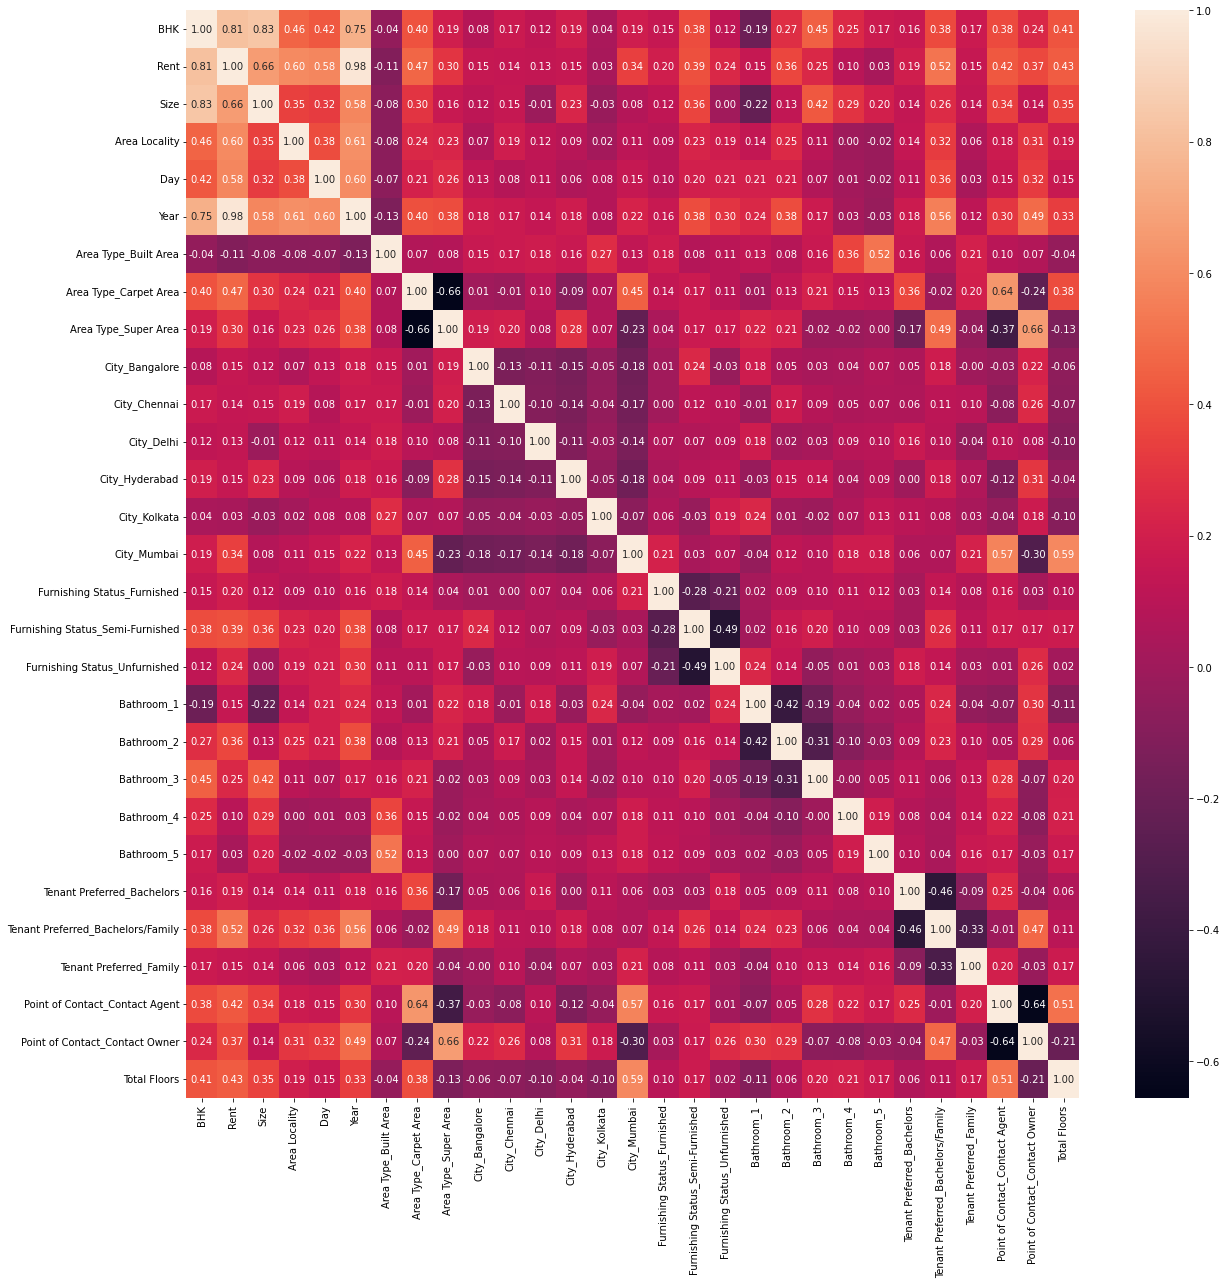

In [66]:
#Correlation between all Features
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f')
plt.show()

# Splitting of Train and Test Data

In [67]:
X=final_df.drop('Rent',axis=1)
y=final_df['Rent']
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Modelling

In [68]:
models = {
    'Linear' : LinearRegression(),
    'ridge' : Ridge(),
    'xgboost' : XGBRegressor(),
    'catboost' : CatBoostRegressor(verbose=0),
    'lightgbm' : LGBMRegressor(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4)
}

In [69]:
#Training Different Models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

Linear trained
ridge trained
xgboost trained
catboost trained
lightgbm trained
gradient boosting trained
lasso trained
random forest trained
bayesian ridge trained
support vector trained
knn trained


# Evaluating the Models

In [70]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train,scoring='neg_mean_squared_error', cv= kf)))
    results[name] = result

In [71]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

Linear : 14085033618.791
ridge : 0.354
xgboost : 0.37
catboost : 0.331
lightgbm : 0.358
gradient boosting : 0.351
lasso : 1.268
random forest : 0.356
bayesian ridge : 0.354
support vector : 0.352
knn : 0.409


In [72]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,Linear,lasso,knn,xgboost,lightgbm,random forest,ridge,bayesian ridge,support vector,gradient boosting,catboost
RMSE,1.408503e+10,1.268299,0.408553,0.369527,0.357817,0.355811,0.354354,0.354275,0.351989,0.350747,0.331262


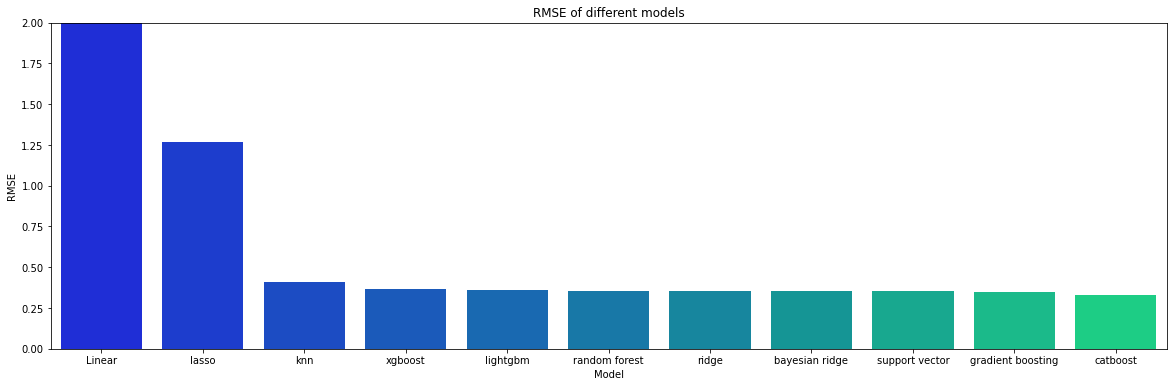

In [73]:
plt.figure(figsize = (20, 6))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'winter')
plt.ylim(0,2)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models');

In [74]:
#Defining the Method in order to get the r2_score of each Model on Test Data and Based
# on that,We will select our Model

def prediction(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred_data=np.exp(model.predict(X_test))
    return r2_score(np.exp(y_test),pred_data)

In [75]:
for name,model in models.items():
    score=prediction(model,X_train,y_train,X_test,y_test)
    print(f'{name} r2_score is {score}')

Linear r2_score is 0.667356035807981
ridge r2_score is 0.6687001695717816
xgboost r2_score is 0.6782093439768724
catboost r2_score is 0.6699485536735215
lightgbm r2_score is 0.7130113622736785
gradient boosting r2_score is 0.6798962425510935
lasso r2_score is -0.03677438959812562
random forest r2_score is 0.6894787273883622
bayesian ridge r2_score is 0.6689207974172564
support vector r2_score is 0.6502212669411573
knn r2_score is 0.5753463137414174


In [76]:
#Lightgbm is giving the r2_score of more than 0.71
#Hence,We Select the LightGBM
#Light GBM is a fast, distributed, high-performance gradient boosting framework 
#based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

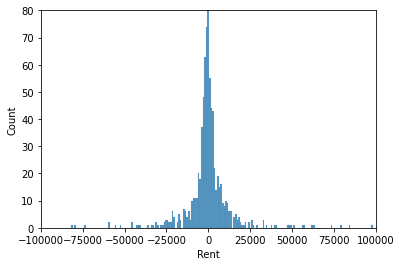

In [77]:
#Error of the Predicted Y with the True Y
model=LGBMRegressor()
model.fit(X_train,y_train)
pred_y=np.exp(model.predict(X_test))
sns.histplot(np.exp(y_test)-pred_y)
plt.xlim(-100000,100000)
plt.ylim(0,80)
plt.show()

Applying Voting Ensemble on the 3 Models

In [78]:
from sklearn.ensemble import VotingRegressor
estimators=[('rf',RandomForestRegressor()),('CB',CatBoostRegressor(verbose=0)),('lgbm',LGBMRegressor())]
vc=VotingRegressor(estimators=estimators)
x=cross_val_score(vc,X_train,y_train,cv=10,scoring='r2')
print(np.round(np.mean(x),2))

0.99


In [79]:
#Fitting the Model
vc.fit(X_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('CB',
                             <catboost.core.CatBoostRegressor object at 0x7f3151473390>),
                            ('lgbm', LGBMRegressor())])

In [80]:
pred_y=vc.predict(X_test)
print(r2_score(np.exp(y_test),np.exp(pred_y)))

0.7055323932185411
